# Correlação nos nossos dados

## Objetivo: Demonstrar formas de aplicar análises de correlação nos nossos dados.

In [1]:
import os
import pandas as pd

repo_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_patch = os.path.join(repo_dir, "materiais", "survey_results_public.csv")
df = pd.read_csv(file_patch, index_col="ResponseId")
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### Correlações nos nossos dados

Podemos procurar por correlações nos nossos conjuntos de dados. Geralmente, partimos de algum pressuposto de como os dados se comportam.

Por exemplo, será que o salário cresce junto dos anos de experiência no trabalho?

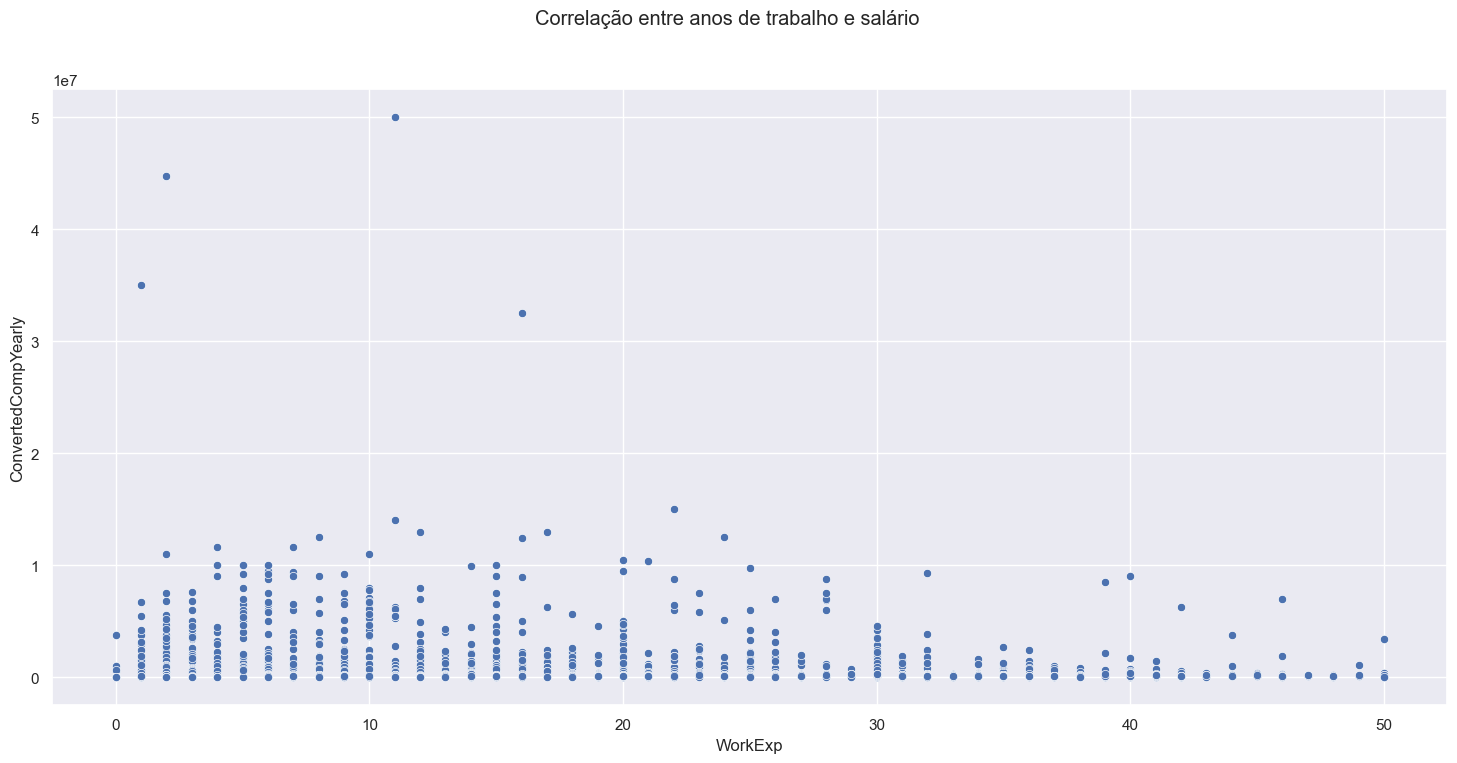

In [3]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.scatterplot(data=df, ax=ax, x='WorkExp', y='ConvertedCompYearly')

fig.suptitle('Correlação entre anos de trabalho e salário')
plt.show()

Alguns poucos pontos com valores altos de salário anual estão dificultando nossa visualização - vamos remover dados de compensação acima de 1 milhão USD/ano:

In [4]:
df_filter = df.loc[df['ConvertedCompYearly'] <= 1_000_000].copy()

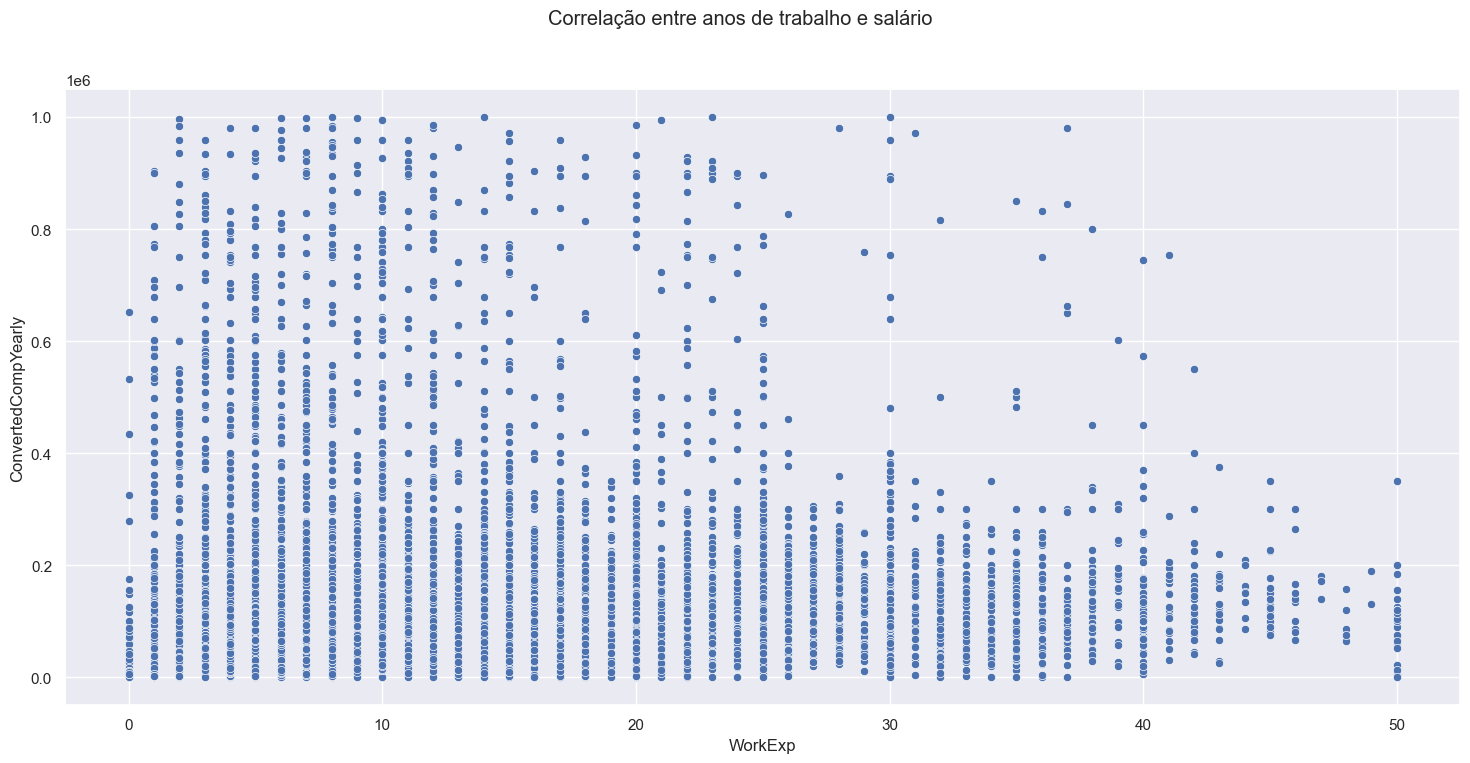

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.scatterplot(data=df_filter, ax=ax, x='WorkExp', y='ConvertedCompYearly')

fig.suptitle('Correlação entre anos de trabalho e salário')
plt.show()

Parece haver duas distribuições de dados aqui - uma para as pessoas que recebem mais salário, e outras para as que recebem menos. Vamos dividi-las e analisá-las de forma separada:

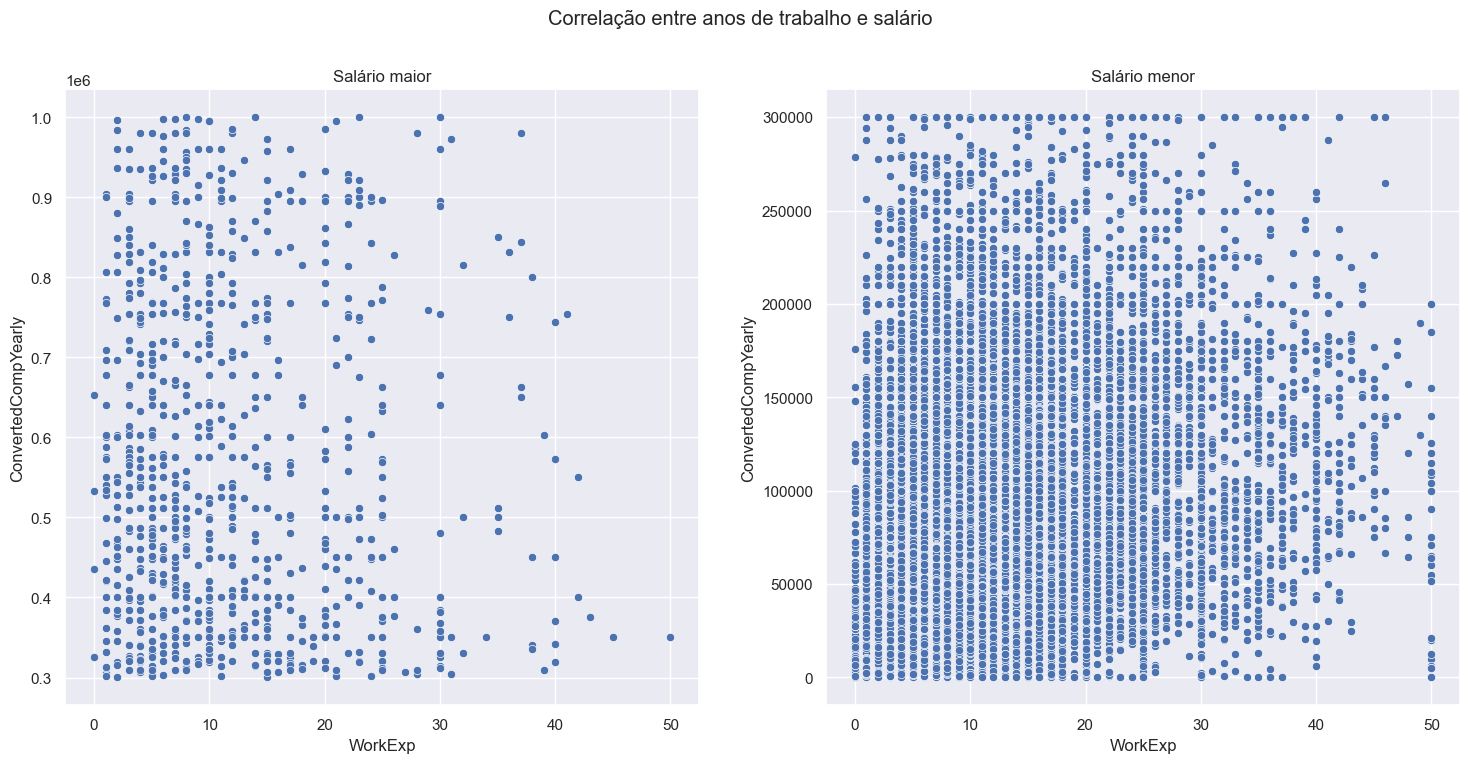

In [6]:
cutoff = 300_000

upper_df = df_filter.loc[df_filter['ConvertedCompYearly'] > cutoff]
lower_df = df_filter.loc[df_filter['ConvertedCompYearly'] <= cutoff]

fig, (ax_esq, ax_dir) = plt.subplots(figsize=(18, 8), ncols=2)

sns.scatterplot(data=upper_df, ax=ax_esq, x='WorkExp', y='ConvertedCompYearly')
ax_esq.set_title('Salário maior')

sns.scatterplot(data=lower_df, ax=ax_dir, x='WorkExp', y='ConvertedCompYearly')
ax_dir.set_title('Salário menor')

fig.suptitle('Correlação entre anos de trabalho e salário')
plt.show()

In [7]:
print('Correlação no salário menor')
lower_df[['WorkExp', 'ConvertedCompYearly']].corr()

Correlação no salário menor


,WorkExp,ConvertedCompYearly
WorkExp,1.000000,0.370994
ConvertedCompYearly,0.370994,1.000000


No grupo de salário menor, parece haver uma correlação positiva, ainda que baixa. Isso significa que é mais difícil encontrar pessoas com pouca experiência ganhando muito, ou com muita experiência ganhando pouco.

In [8]:
print('Correlação no salário maior')
upper_df[['WorkExp', 'ConvertedCompYearly']].corr()

Correlação no salário maior


,WorkExp,ConvertedCompYearly
WorkExp,1.000000,-0.042342
ConvertedCompYearly,-0.042342,1.000000


Já no grupo de salário maior, a correlação é praticamente zero.

### Correlações como histogramas

Podemos visualizar uma correlação como um histograma 2D. Este tipo de gráfico é uma forma de tentar medir a "densidade" de pontos do gráfico anterior.

Aqui um exemplo:

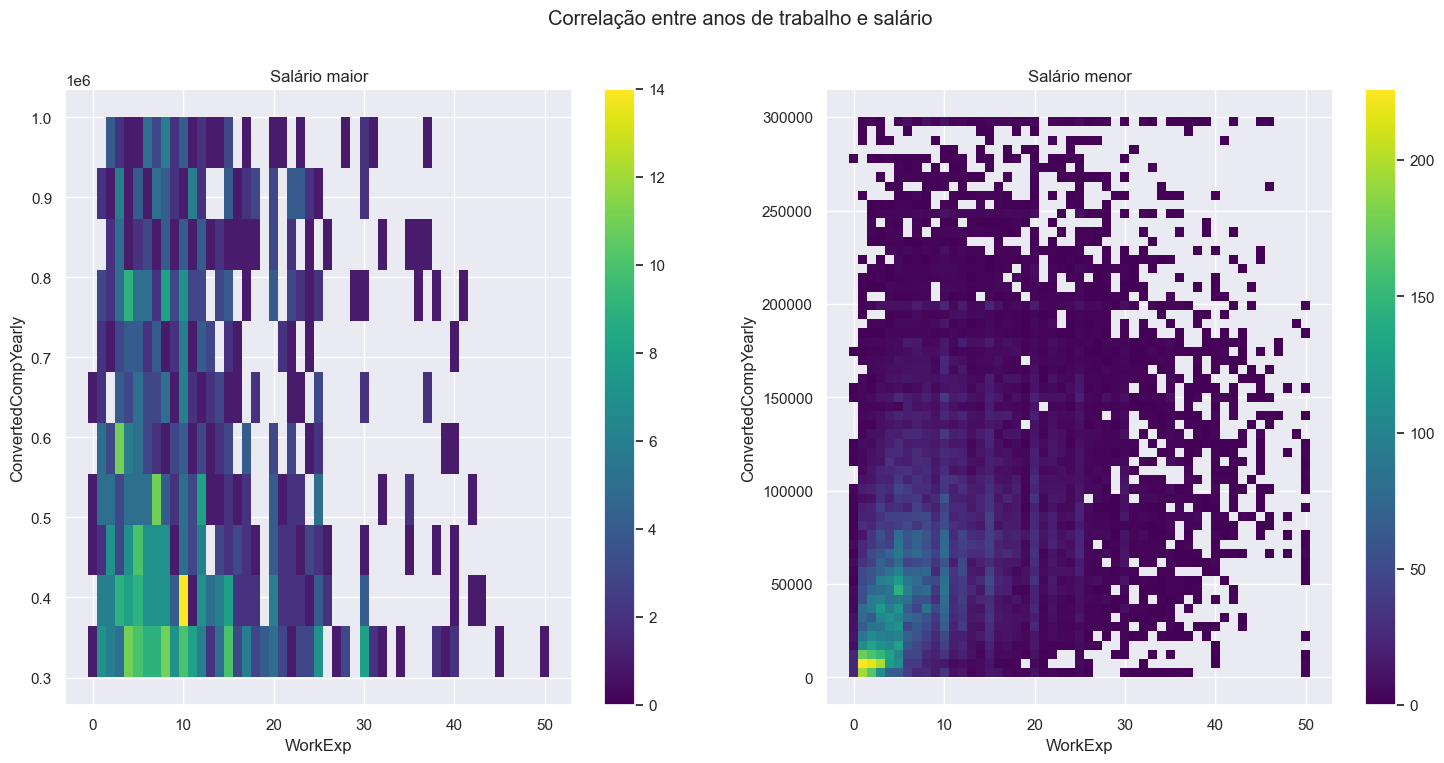

In [9]:
fig, (ax_esq, ax_dir) = plt.subplots(figsize=(18, 8), ncols=2)

cmap = 'viridis'

sns.histplot(data=upper_df, ax=ax_esq, x='WorkExp', y='ConvertedCompYearly', discrete=(True, False), cmap='viridis', cbar=True)
ax_esq.set_title('Salário maior')

sns.histplot(data=lower_df, ax=ax_dir, x='WorkExp', y='ConvertedCompYearly', discrete=(True, False), cmap='viridis', cbar=True)
ax_dir.set_title('Salário menor')

fig.suptitle('Correlação entre anos de trabalho e salário')
plt.show()

Quanto maior a densidade dos dados estiver em uma diagonal, maior a correlação.

### Correlação por segmentos

Podemos também analisar a correlação dos dados por diferentes segmentos, usando outra coluna para dividirmos os dados.

Vamos analisar a relação entre anos de experiência e salário por país. Para isto, vamos primeiro selecionar alguns países para analisar:

In [10]:
paises = ['United States of America', 'Germany', 'Brazil', 'South Africa', 'India', 'Australia']
df_paises = df_filter.loc[df_filter['Country'].isin(paises)].copy()

Antes de seguirmos com a análise, vamos conferir quantas respostas vieram de cada país:

In [11]:
df_paises['Country'].value_counts()

Country
United States of America    8252
Germany                     2874
India                       2161
Brazil                      1279
Australia                    798
South Africa                 273
Name: count, dtype: int64

Grande parte das respostas veio dos EUA, mas ainda assim temos um bom número de respostas para cada país.

Eis a correlação usando o parâmetro `hue` para categorizar cada ponto:

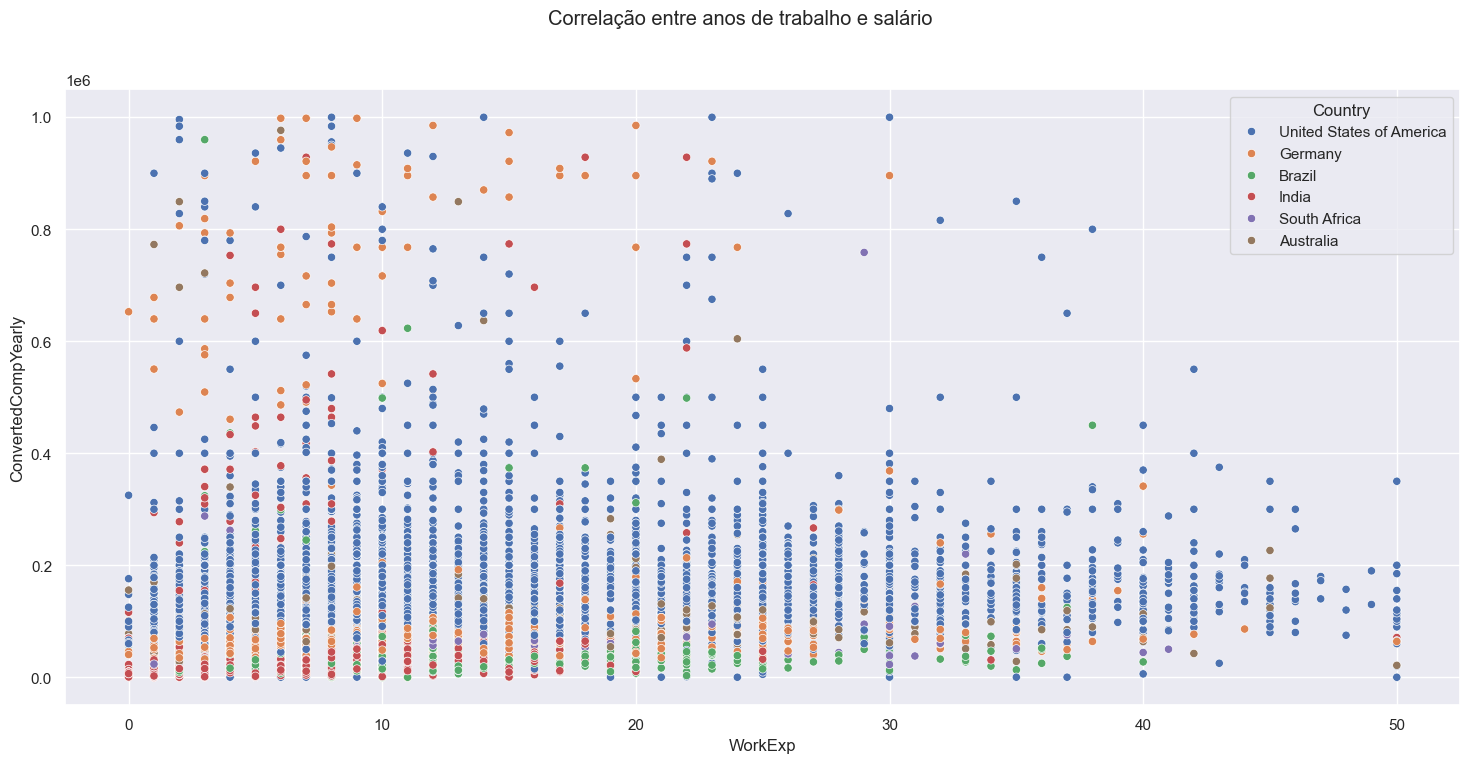

In [12]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.scatterplot(data=df_paises, ax=ax, x='WorkExp', y='ConvertedCompYearly', hue='Country')

fig.suptitle('Correlação entre anos de trabalho e salário')
plt.show()

Por mais que sejam apenas 6 países, a sobreposição dos pontos dificulta compreender estes dados.

Vamos usar a função `sns.relplot`, uma função "especial" do `seaborn` capaz de plotar uma figura inteira com vários gráficos com uma chamada só.

Detalhe: esses tipos de plots do `seaborn` não aceitam que nós especifiquemos os `Axes` individualmente, como fizemos até aqui. Na realidade, esse método sempre constrói e retorna um `FacetGrid`, que corresponde ao conjunto de `Axes` da figura final.

Usamos ela para separar os dados de cada país em um gráfico (usando o argumento `col` e limitando o número de gráficos por coluna com `col_wrap`):

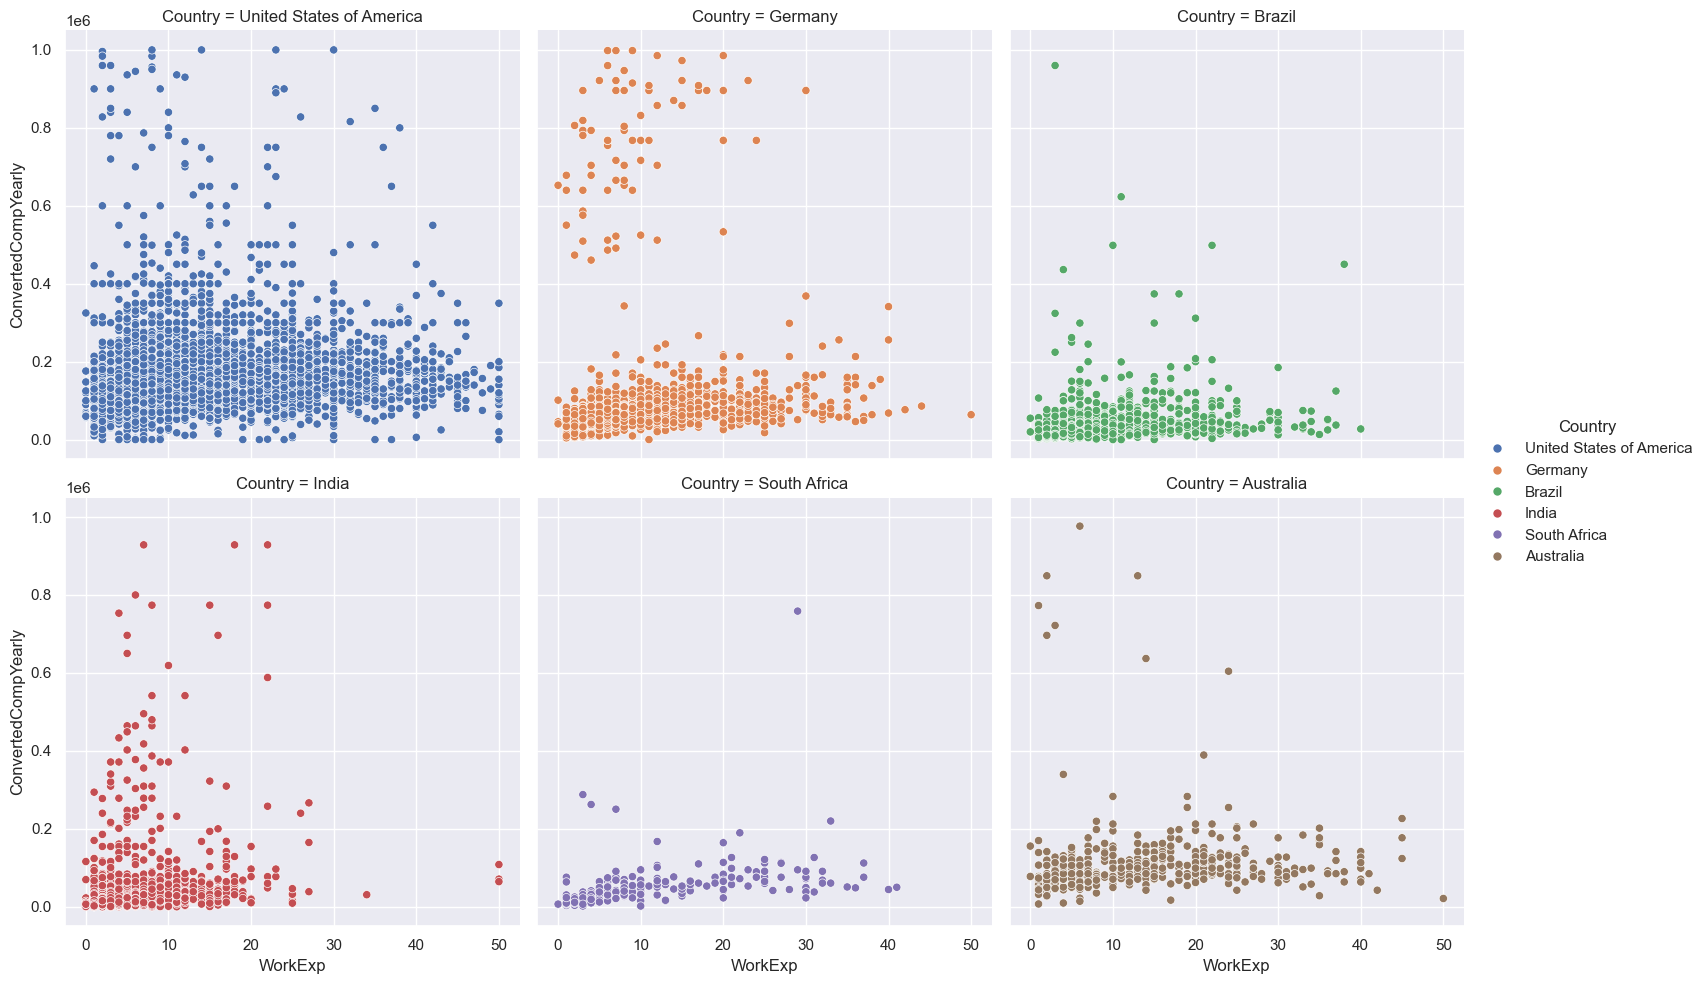

In [13]:
g = sns.relplot(data=df_paises, x='WorkExp', y='ConvertedCompYearly', col='Country', hue='Country', col_wrap=3)
plt.show()

Vamos medir a correlação entre as variáveis. Para isso, vamos:
1) Selecionar apenas as colunas de interesse
2) Agrupar os dados por país
3) Calcular a correlação

Eis o código:

In [14]:
df_paises[['WorkExp', 'ConvertedCompYearly', 'Country']].groupby('Country').corr()

WorkExp  ConvertedCompYearly
Country                                                                    
Australia                WorkExp              1.000000             0.054412
                         ConvertedCompYearly  0.054412             1.000000
Brazil                   WorkExp              1.000000             0.186447
                         ConvertedCompYearly  0.186447             1.000000
Germany                  WorkExp              1.000000             0.090473
                         ConvertedCompYearly  0.090473             1.000000
India                    WorkExp              1.000000             0.224852
                         ConvertedCompYearly  0.224852             1.000000
South Africa             WorkExp              1.000000             0.345736
                         ConvertedCompYearly  0.345736             1.000000
United States of America WorkExp              1.000000             0.131599
                         ConvertedCompYearly  0.131599             1.000000

Para cada país, foi calculado a matriz de correlação 2x2. Mas na realidade, só temos interesse em 1 valor dessa matriz. Podemos usar `iloc` para selecionar apenas algumas linhas e colunas, simplificando o output:

In [15]:
df_paises[['WorkExp', 'ConvertedCompYearly', 'Country']].groupby('Country').corr().iloc[1::2, 0].sort_values(ascending=False)

Country                                      
South Africa              ConvertedCompYearly    0.345736
India                     ConvertedCompYearly    0.224852
Brazil                    ConvertedCompYearly    0.186447
United States of America  ConvertedCompYearly    0.131599
Germany                   ConvertedCompYearly    0.090473
Australia                 ConvertedCompYearly    0.054412
Name: WorkExp, dtype: float64

Poderíamos ainda explorar os gráficos acima - será que removendo outliers, as correlações subiriam? Provavelmente sim!